In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [87]:
df = pd.read_csv("sepSheets/tensileSheet.csv")
df

,SaltWater,Modulus(GPa),MaximumForce(KN),TensileStrain,TensileStrength(MPa)
0,0,7.205,3.02,1.60,79.80
1,0,6.975,2.93,1.64,77.49
2,0,6.842,2.96,1.73,78.40
3,0,7.026,2.92,1.63,77.29
4,0,6.906,3.02,1.72,79.83
5,1,10.223,2.72,1.57,113.98
6,1,10.059,2.81,1.60,117.91
7,1,9.564,2.76,1.67,115.53
8,1,10.182,2.80,1.59,117.32
9,1,10.011,2.83,1.66,118.37


In [88]:
df.describe()

,SaltWater,Modulus(GPa),MaximumForce(KN),TensileStrain,TensileStrength(MPa)
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.500000,8.499300,2.877000,1.641000,97.592000
std,0.527046,1.602383,0.107191,0.054252,20.112785
min,0.000000,6.842000,2.720000,1.570000,77.290000
25%,0.000000,6.987750,2.802500,1.600000,78.750000
50%,0.500000,8.384500,2.875000,1.635000,96.905000
75%,1.000000,10.047000,2.952500,1.667500,116.872500
max,1.000000,10.223000,3.020000,1.730000,118.370000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SaltWater             10 non-null     int64  
 1   Modulus(GPa)          10 non-null     float64
 2   MaximumForce(KN)      10 non-null     float64
 3   TensileStrain         10 non-null     float64
 4   TensileStrength(MPa)  10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [90]:
df.columns

Index(['SaltWater', 'Modulus(GPa)', 'MaximumForce(KN)', 'TensileStrain',
       'TensileStrength(MPa)'],
      dtype='object')

In [91]:
px.box(df)

Text(0.5, 1.0, '\nRaw Data Correlation Matrix\n')

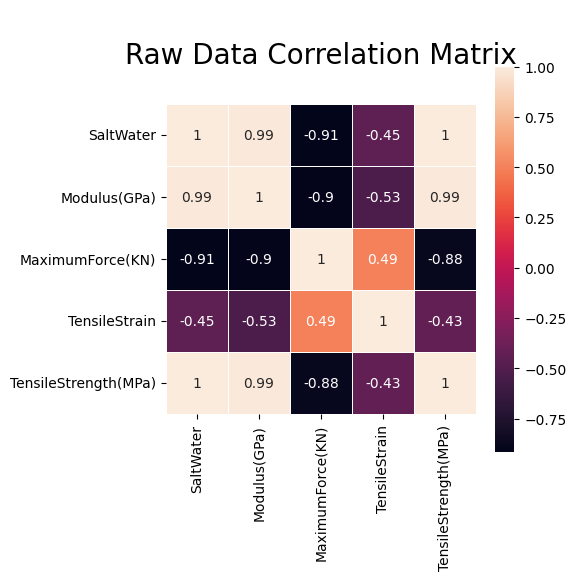

In [92]:
plt.figure(figsize=(df.corr().shape))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, square = True, annot=True)
plt.title("\nRaw Data Correlation Matrix\n", size = 20)

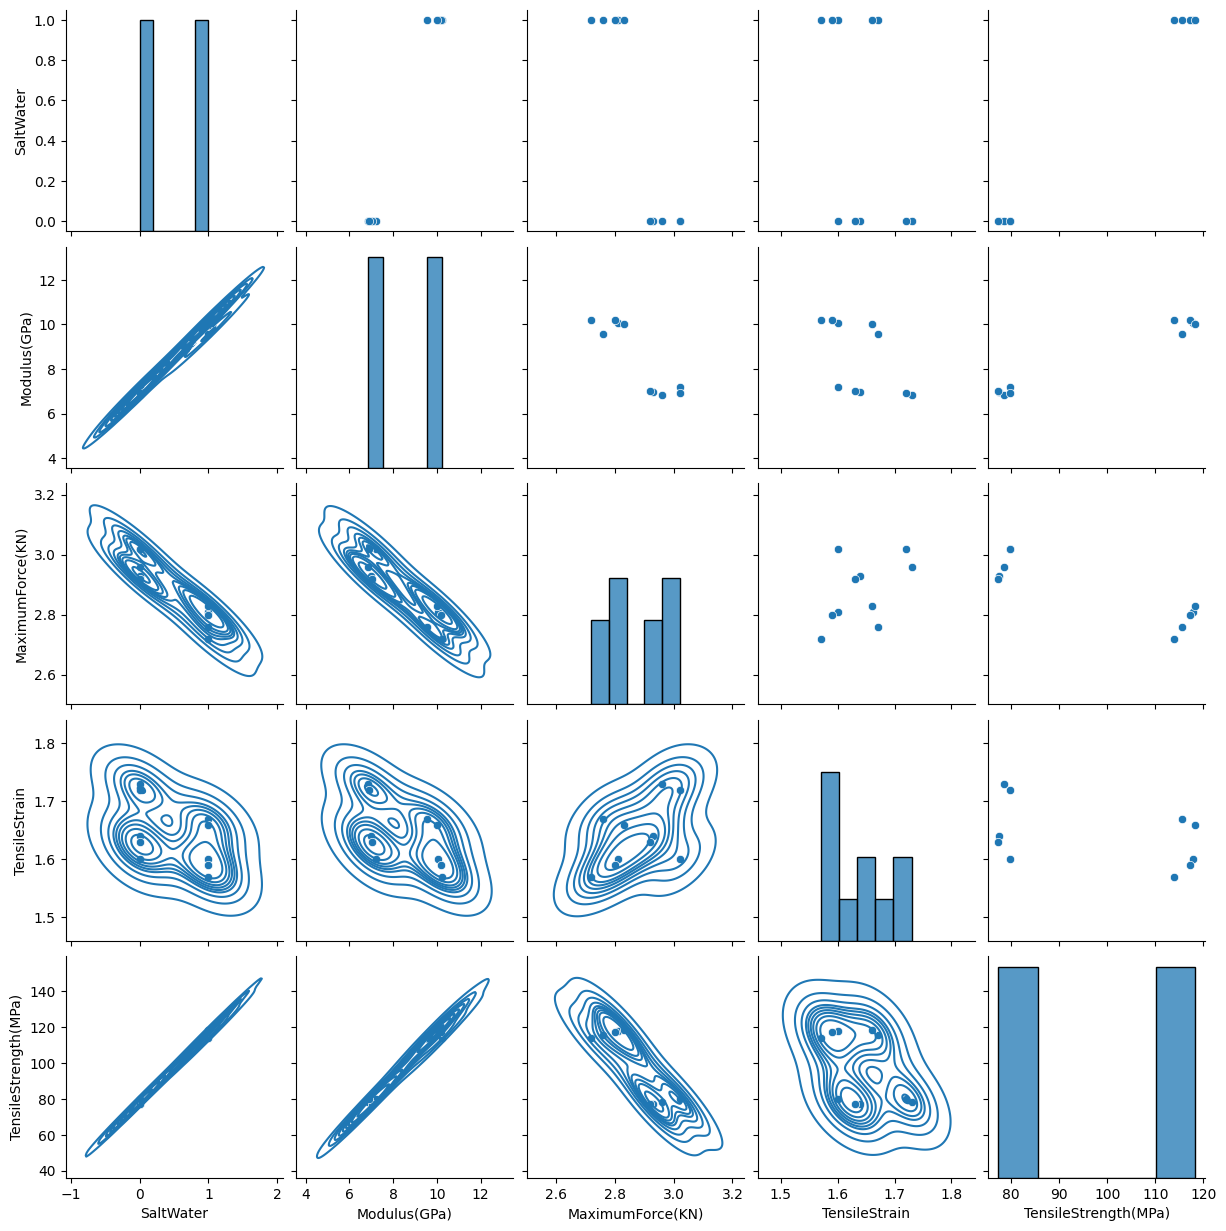

In [93]:
pairGrid = sns.pairplot(data = df)
pairGrid.map_lower(sns.kdeplot)

In [96]:
fig = px.scatter_3d(df, x='Modulus(GPa)', y='MaximumForce(KN)', z='TensileStrain', color='TensileStrength(MPa)')
fig.show()

In [97]:
fig = px.scatter_3d(df, x='Modulus(GPa)', y='MaximumForce(KN)', z='TensileStrain', color='SaltWater')
fig.show()

In [98]:
fig = px.scatter_3d(df, x='TensileStrength(MPa)', y='MaximumForce(KN)', z='TensileStrain', color='SaltWater')
fig.show()

In [99]:
dataStuff = df[['SaltWater', 'Modulus(GPa)', 'MaximumForce(KN)', 'TensileStrain']]
targetStuff = df['TensileStrength(MPa)']

In [150]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model

In [101]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [102]:
yPred = modelLR.predict(xTest)
yPred

array([117.87024603,  77.49612838, 115.98929889,  80.08072969])

In [103]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
maeLR = mean_absolute_error(yTest, yPred)
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Absolute Error:', maeLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  1.0510589216630182
Mean Absolute Error: 0.7116007457813822
Mean Squared Error: 1.1047248568074266
R-squared: 0.9967923573563424


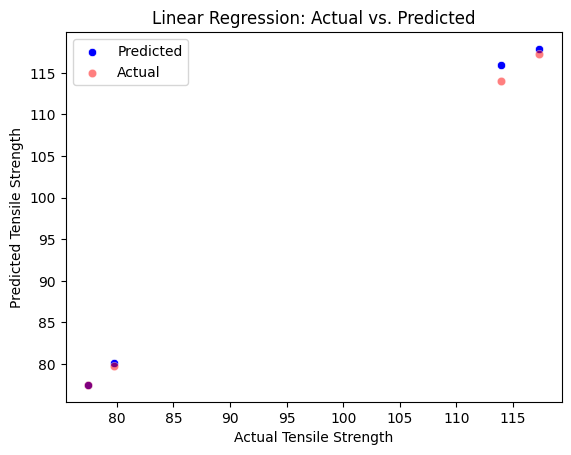

In [104]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model

In [105]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [106]:
yPred = modelRR.predict(xTest)
yPred

array([119.20452945,  80.41324757, 119.69170141,  82.84432658])

In [107]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
maeRR = mean_absolute_error(yTest, yPred)
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print("Mean Absolute Error: ", maeRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  3.6738360372210415
Mean Absolute Error:  3.3909512512200486
Mean Squared Error: 13.497071228384007
R-squared: 0.960810349319228


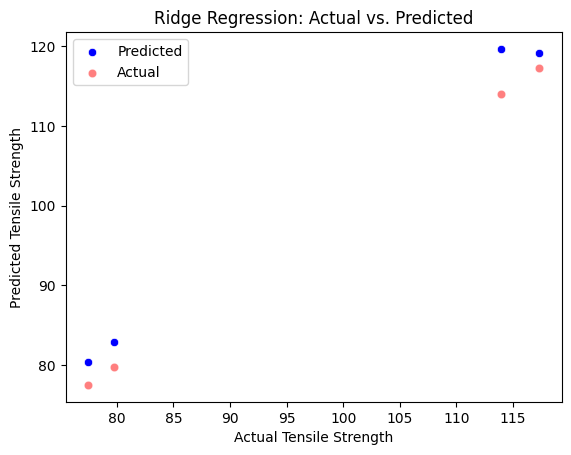

In [108]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model

In [109]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [110]:
yPred = modelLSR.predict(xTest)
yPred

array([120.24999444,  79.9764    , 120.76487357,  82.86474634])

In [111]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
maeLSR = mean_absolute_error(yTest, yPred)
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print("Mean Absolute Error: ", maeLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  4.189099899426942
Mean Absolute Error:  3.816503587485464
Mean Squared Error: 17.54855796737882
R-squared: 0.9490465861033176


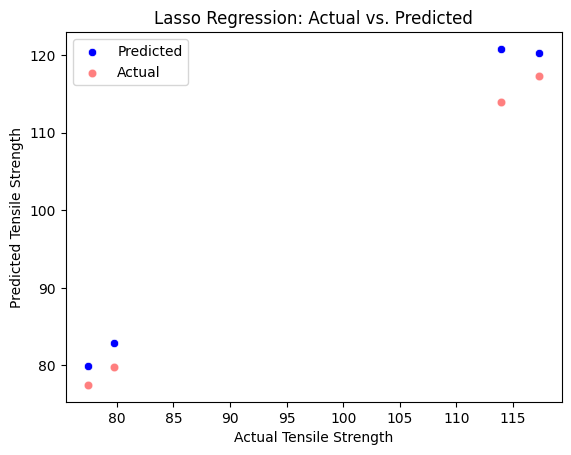

In [112]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model

In [113]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [114]:
yPred = modelEN.predict(xTest)
yPred

array([116.4900138 ,  82.71721065, 116.88696451,  84.94400734])

In [115]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
maeEN = mean_absolute_error(yTest, yPred)
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print("Mean Absolute Error: ", maeEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  3.966228134115872
Mean Absolute Error:  3.5270421754434054
Mean Squared Error: 15.73096561185227
R-squared: 0.9543240872950821


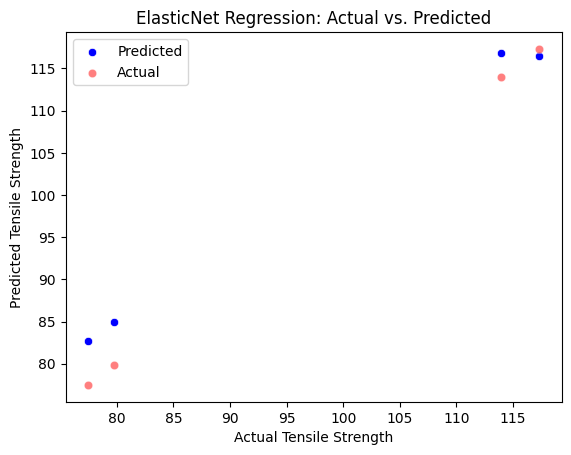

In [116]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model

In [117]:
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    maePR = mean_absolute_error(yTest, yPred)
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print("Mean Absolute Error: ", maePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  1.051058921663021
Mean Absolute Error:  0.7116007457814
Mean Squared Error: 1.1047248568074328
R-squared: 0.9967923573563423


Poly Features Degree:  2
Root Mean Square Error:  0.8365640324771434
Mean Absolute Error:  0.5838230680693819
Mean Squared Error: 0.6998393804344191
R-squared: 0.9979679694662797


Poly Features Degree:  3
Root Mean Square Error:  0.17326589308559362
Mean Absolute Error:  0.16864515261937996
Mean Squared Error: 0.03002106970674836
R-squared: 0.9999128318125493


Poly Features Degree:  4
Root Mean Square Error:  0.9576500579491505
Mean Absolute Error:  0.6729820654747058
Mean Squared Error: 0.9170936334900113
R-squared: 0.9973371571854455


Poly Features Degree:  5
Root Mean Square Error:  2.340366279698644
Mean Absolute Error:  1.5248738886331594
Mean Squared Error: 5.477314323150473
R-squared: 0.984096250856138


Poly Features Degree:  6
Root Mean Square Error:  4.242829768690483
Mean Absolute Error:  2.6850014

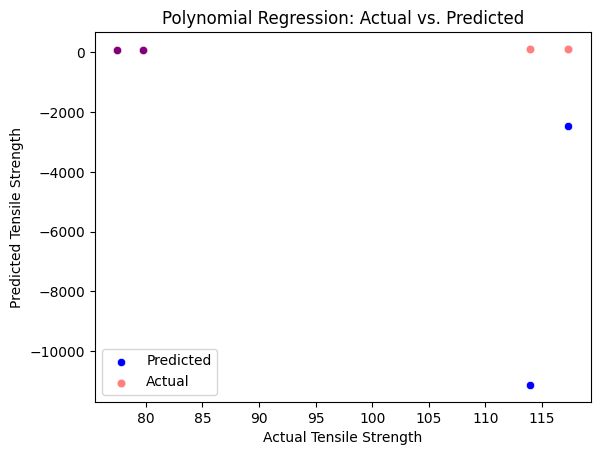

In [118]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model

In [119]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [120]:
yPred = modelKN.predict(xTest)
yPred

array([117.27      ,  78.50666667, 117.27      ,  78.50666667])

In [121]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
maeKN = mean_absolute_error(yTest, yPred)
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print("Mean Ansolute Error: ", maeKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  1.839356016532836
Mean Ansolute Error:  1.4124999999999979
Mean Squared Error: 3.383230555555542
R-squared: 0.9901765633891072


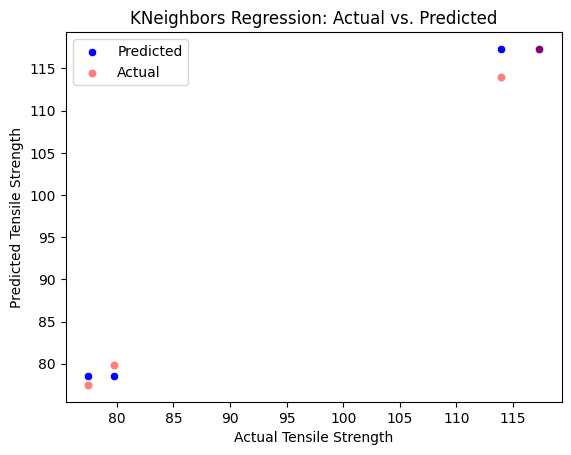

In [122]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model

In [123]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [124]:
yPred = modelDT.predict(xTest)
yPred

array([117.91,  77.29, 117.91,  79.83])

In [125]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
maeDT = mean_absolute_error(yTest, yPred)
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Absolute Error:', maeDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  1.989591666649211
Mean Absolute Error: 1.1874999999999964
Mean Squared Error: 3.9584749999999853
R-squared: 0.9885063026004982


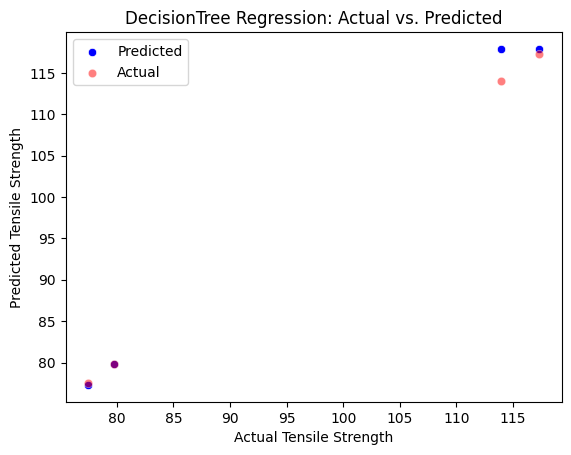

In [126]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model

In [127]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [128]:
yPred = modelRF.predict(xTest)
yPred

array([117.8346,  80.5216, 117.4308,  81.3141])

In [129]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
maeRF = mean_absolute_error(yTest, yPred)
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Ansolute Error:', maeRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  2.4318681692270827
Mean Ansolute Error: 2.1277749999999678
Mean Squared Error: 5.9139827924998825
R-squared: 0.9828283546964791


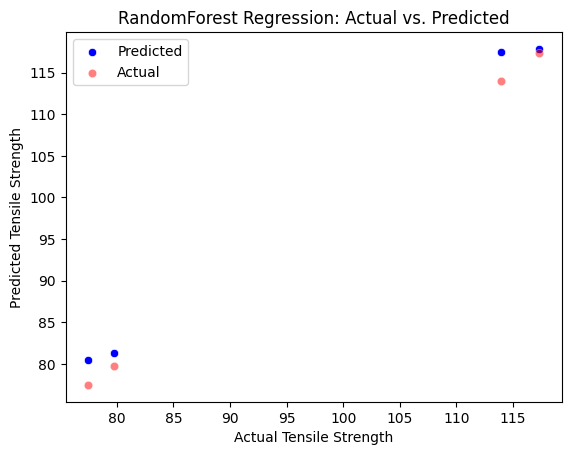

In [130]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model

In [131]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [132]:
yPred = modelSVR.predict(xTest)
yPred

array([98.50441857, 97.09959178, 98.51906688, 97.18211226])

In [133]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
maeSVR = mean_absolute_error(yTest, yPred)
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Absolute Error:', maeSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  17.88673023550316
Mean Absolute Error: 17.81705464887705
Mean Squared Error: 319.93511851766283
R-squared: 0.0710469461810963


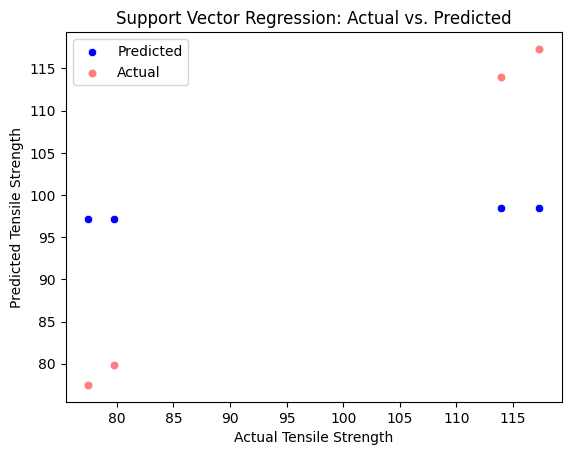

In [134]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg Model

In [135]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [136]:
yPred = modelGBR.predict(xTest)
yPred

array([117.9094682 ,  77.29054712, 117.18735393,  79.83047965])

In [137]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
maeGBR = mean_absolute_error(yTest, yPred)
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Absolute Error:', maeGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  1.6336540669187551
Mean Absolute Error: 1.006688664908154
Mean Squared Error: 2.6688256103601886
R-squared: 0.9922508860160741


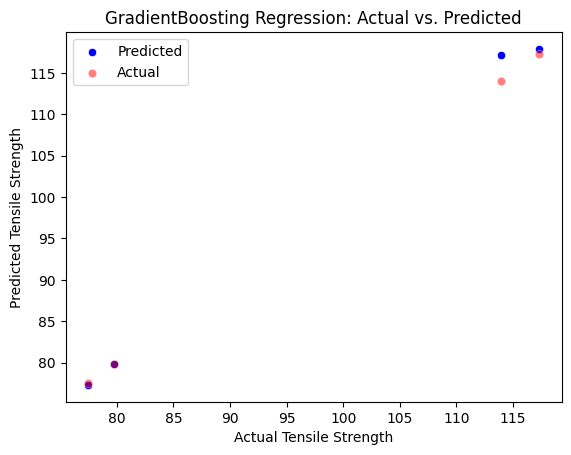

In [138]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [139]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
maeScores = [maeLR, maeRR, maeLSR, maeEN, maePR, maeKN, maeDT, maeRF, maeSVR, maeGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [140]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [141]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared)')
fig.show()

In [142]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error)')
fig.show()

In [143]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error)')
fig.show()

In [144]:
rsDf = pd.DataFrame(list(zip(models, maeScores)), columns = ['Model', 'MAE'])
fig = px.bar(rsDf, x='Model', y='MAE', title='Model Comparison (Mean Absolute Error)')
fig.show()

In [145]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([ 80.08072969,  77.49612838,  78.30665898,  77.35458017,
         79.85876084, 115.98929889, 117.80073423, 115.54896798,
        117.87024603, 118.46029778]),
 array([ 82.84432658,  80.41324757,  78.96765303,  80.96941344,
         79.62415162, 119.69170141, 117.86974812, 112.55324181,
        119.20452945, 117.34579197]),
 array([ 82.86474634,  79.9764    ,  78.30618233,  80.61685941,
         79.1098961 , 120.76487357, 118.70535705, 112.4891334 ,
        120.24999444, 118.10257172]),
 array([ 84.94400734,  82.71721065,  81.42954127,  83.21097861,
         82.04917165, 116.88696451, 115.29916166, 110.50670793,
        116.4900138 , 114.83443887]),
 array([    81.25216341,     77.83427578,     78.4       ,     77.29      ,
            79.83      , -11128.96392554,    117.91      ,    115.53      ,
         -2475.41923442,    118.37      ]),
 array([ 78.50666667,  78.50666667,  78.50666667,  78.50666667,
         78.50666667, 117.27      , 117.27      , 117.27      ,
        117.

In [146]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [147]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [148]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

,Predicted Values,Models,Index
0,80.080730,Linear Reg,0
1,77.496128,Linear Reg,1
2,78.306659,Linear Reg,2
3,77.354580,Linear Reg,3
4,79.858761,Linear Reg,4
...,...,...,...
105,113.980000,Actual Targets,5
106,117.910000,Actual Targets,6
107,115.530000,Actual Targets,7
108,117.320000,Actual Targets,8


In [149]:
fig = px.line(combinedDf, x='Index', y='Predicted Values', color='Models')
fig.show()

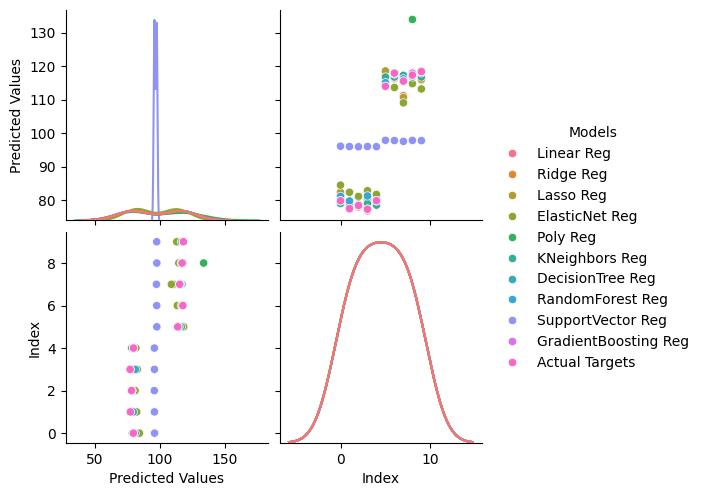

In [85]:
pairGrid = sns.pairplot(data=combinedDf, hue="Models", diag_kind="scatter")
pairGrid.map_diag(sns.kdeplot)
plt.show()